In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.ticker as mtick
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Reading and understanding the data

In [2]:
# Reading the dataset
Churn_Data = pd.read_csv('Churn_ Data.csv')
Churn_Data.head()

,s6.new.rev.p2.m2,s1.new.rev.m1,s3.og.rev.4db.p5,s3.new.rev.4db.p5,s4.usg.ins.p2,s4.og.unq.any.p2,s2.rch.val.p6,s1.og.rev.all.m1,s8.new.rev.p6,s4.loc.ic.ins.p1,...,prop.og.mou.tot.mou.all.p6,prop.i2i.og.mou.p6,s4.loc.ic.ins.p2,s4.std.ic.ins.l14,s4.low.blnc.ins.p4,s3.og.rev.all.m2,s3.new.rev.m2,prop.og.mou.any.p6,prop.loc.i2i.mou.og.mou.p3,s3.rev.p1
0,-0.76,88.0482,3.106604,3.754955,4,14,39.29,57.320,-0.17,1,...,0.454642,0.497397,4,0,9,6.02,8.20,46.465636,0.609456,0.22
1,-0.98,67.5039,3.094574,5.550865,1,2,21.67,38.700,-0.32,3,...,0.343190,0.767617,6,0,20,3.66,8.10,34.525456,1.000000,0.38
2,-0.98,33.9248,2.324016,2.438114,2,3,30.00,15.320,-0.05,3,...,0.101838,0.619034,6,1,19,4.33,4.36,10.298451,0.699592,0.11
3,-0.92,82.6780,2.630749,2.858961,2,3,50.00,51.956,-0.18,4,...,0.066602,0.437088,7,2,11,3.40,3.53,6.670783,0.086617,5.18
4,-0.97,96.8379,2.674316,2.912397,3,2,22.50,66.886,0.01,4,...,0.219821,0.585977,6,1,14,3.85,3.87,21.998905,0.683105,0.10


In [3]:
Churn_Data.describe()

,s6.new.rev.p2.m2,s1.new.rev.m1,s3.og.rev.4db.p5,s3.new.rev.4db.p5,s4.usg.ins.p2,s4.og.unq.any.p2,s2.rch.val.p6,s1.og.rev.all.m1,s8.new.rev.p6,s4.loc.ic.ins.p1,...,prop.og.mou.tot.mou.all.p6,prop.i2i.og.mou.p6,s4.loc.ic.ins.p2,s4.std.ic.ins.l14,s4.low.blnc.ins.p4,s3.og.rev.all.m2,s3.new.rev.m2,prop.og.mou.any.p6,prop.loc.i2i.mou.og.mou.p3,s3.rev.p1
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,...,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,-0.003730,281.073083,4.890003,7.070194,5.460080,28.532520,72.208906,218.517937,-0.028327,3.254720,...,0.538407,0.485523,5.731280,1.797320,8.382160,8.008660,12.540182,53.594165,0.483975,9.951366
std,2.727916,276.075983,4.212452,6.318992,2.184444,28.061435,67.921490,231.321064,0.354573,1.193271,...,0.209203,0.271146,1.936848,3.048943,8.961016,6.152429,11.540611,21.408486,0.292349,17.648128
min,-1.000000,0.000000,0.000000,0.000833,0.000000,0.000000,0.000000,0.000000,-5.090000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.580000,101.563800,2.367288,3.318825,5.000000,9.000000,33.000000,74.420000,-0.160000,3.000000,...,0.394227,0.274034,5.000000,0.000000,1.000000,4.207500,6.167500,39.378142,0.251304,1.970000
50%,-0.170000,204.859600,3.729944,5.231268,7.000000,21.000000,52.260000,151.168500,-0.020000,4.000000,...,0.539354,0.476759,7.000000,0.000000,5.000000,6.345000,9.350000,53.976203,0.477621,5.380000
75%,0.280000,370.711650,5.993342,8.395736,7.000000,39.000000,89.852500,284.265000,0.110000,4.000000,...,0.682695,0.694104,7.000000,2.000000,14.000000,9.830000,14.620000,68.312416,0.716538,11.400000
max,316.860000,5702.924300,153.221695,170.200441,7.000000,622.000000,2249.000000,3767.565000,5.000000,4.000000,...,1.000000,1.000000,7.000000,14.000000,30.000000,171.780000,386.480000,100.000000,1.000000,585.500000


### Q1)Convert data type of variables which are misclassified.

In [4]:
Churn_Data.dtypes.value_counts()

float64    80
int64      31
Name: count, dtype: int64

In [5]:
#checking the datatypes.
pd.set_option('display.max_rows', None)
Churn_Data.dtypes

s6.new.rev.p2.m2              float64
s1.new.rev.m1                 float64
s3.og.rev.4db.p5              float64
s3.new.rev.4db.p5             float64
s4.usg.ins.p2                   int64
s4.og.unq.any.p2                int64
s2.rch.val.p6                 float64
s1.og.rev.all.m1              float64
s8.new.rev.p6                 float64
s4.loc.ic.ins.p1                int64
s8.mbl.p2                     float64
s2.rch.val.l67                float64
s7.s4.day.no.mou.p2.p4        float64
s3.new.rev.p3                 float64
s7.s5.s4.day.nomou.p4         float64
s8.og.rev.p3                  float64
s8.ic.mou.all.p3              float64
target                          int64
s7.new.rev.p2.p6              float64
s6.rtd.mou.p2.m2              float64
s7.rtd.mou.p2.p6              float64
s1.new.rev.p2                 float64
s1.new.rev.p1                 float64
s1.og.hom.mou.p1              float64
s7.rev.p2.p6                  float64
s1.og.hom.rev.p2              float64
s1.rtd.mou.p

In [6]:
Churn_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Columns: 111 entries, s6.new.rev.p2.m2 to s3.rev.p1
dtypes: float64(80), int64(31)
memory usage: 21.2 MB


### Q2) Removing Duplicate records


In [7]:
print ("Number of the record befor removing duplicates:", len (Churn_Data))
Churn_Data.drop_duplicates(inplace=True)

print("Number of the record after removing duplicates:" , len (Churn_Data))


Number of the record befor removing duplicates: 25000
Number of the record after removing duplicates: 25000


In [8]:
Churn_Data.shape

(25000, 111)

### Q3) Removing unique value variables


In [9]:
num_columns_before = len (Churn_Data.columns)
for columns in Churn_Data.columns:
    if len(Churn_Data[columns].unique()) == 1:
        Churn_Data.drop(column, axis=1, inplace = True)
num_columns_after = len(Churn_Data.columns) 

print ("Number of columns before removing unique value variables:", num_columns_before)
print ("Number of columns after removing unique value variables:", num_columns_after)

Number of columns before removing unique value variables: 111
Number of columns after removing unique value variables: 111


In [10]:
Churn_Data.shape

(25000, 111)

### Q4) Removing Zero variance variables


In [11]:
num_columns_before = len (Churn_Data.columns)
for column in Churn_Data.columns:
    if Churn_Data[column].var() == 0:
        Churn_Data.drop(column, axis=1, inplace = True)
num_columns_after = len(Churn_Data.columns) 

print ("Number of columns before removing zero variance variables:", num_columns_before)
print ("Number of columns after removing zero variance variables:", num_columns_after)

Number of columns before removing zero variance variables: 111
Number of columns after removing zero variance variables: 111


In [12]:
Churn_Data.shape

(25000, 111)

## Q6) Outlier Treatment

### Using Boxplot: Q3+(1.5*IQR) & Q1-(1.5*IQR)

In [13]:
def detect_outliers_iqr(data_column, multiplier= 1.5):
    Q1 = np.percentile(data_column, 25)
    Q3 = np.percentile(data_column, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    return (data_column < lower_bound) | (data_column > upper_bound)

multiplier = 2.5
outliers = {}
for column in Churn_Data.select_dtypes(include=np.number). columns:
    outliers[column] = detect_outliers_iqr(Churn_Data[column], multiplier=multiplier)
    
#Outliers Counts
outlier_counts = {col: outliers[col].sum() for col in outliers}
for col, count in outlier_counts.items():
    print (f"Column '{col}': {count} Outliers Detected ")
    
#Removing Outliers
def remove_outliers(df, multiplier= 1.5):
    numeric_columns = df.select_dtypes(include= ['float64','int64']).columns
    for column in numeric_columns:
        outlier_mask = detect_outliers_iqr(df[column], multiplier=multiplier)
        df = df[~outlier_mask]
    return df

#Make a copy  of the original dataframe before removing outliers
Churn_Data_Clean = Churn_Data.copy()
Churn_Data_Clean = remove_outliers(Churn_Data_Clean, multiplier=multiplier)

print ("Number of record after outlier treatment:", len (Churn_Data_Clean))


Column 's6.new.rev.p2.m2': 424 Outliers Detected 
Column 's1.new.rev.m1': 549 Outliers Detected 
Column 's3.og.rev.4db.p5': 704 Outliers Detected 
Column 's3.new.rev.4db.p5': 982 Outliers Detected 
Column 's4.usg.ins.p2': 0 Outliers Detected 
Column 's4.og.unq.any.p2': 406 Outliers Detected 
Column 's2.rch.val.p6': 597 Outliers Detected 
Column 's1.og.rev.all.m1': 691 Outliers Detected 
Column 's8.new.rev.p6': 941 Outliers Detected 
Column 's4.loc.ic.ins.p1': 1546 Outliers Detected 
Column 's8.mbl.p2': 2750 Outliers Detected 
Column 's2.rch.val.l67': 619 Outliers Detected 
Column 's7.s4.day.no.mou.p2.p4': 0 Outliers Detected 
Column 's3.new.rev.p3': 1098 Outliers Detected 
Column 's7.s5.s4.day.nomou.p4': 0 Outliers Detected 
Column 's8.og.rev.p3': 1162 Outliers Detected 
Column 's8.ic.mou.all.p3': 1355 Outliers Detected 
Column 'target': 0 Outliers Detected 
Column 's7.new.rev.p2.p6': 86 Outliers Detected 
Column 's6.rtd.mou.p2.m2': 509 Outliers Detected 
Column 's7.rtd.mou.p2.p6': 141

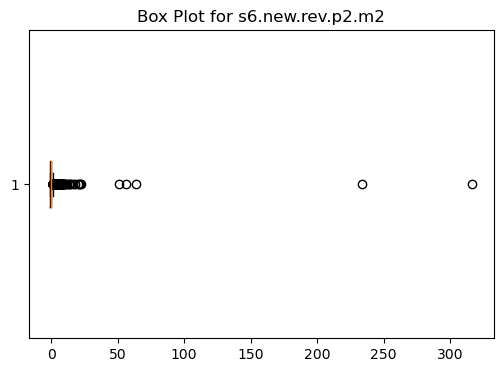

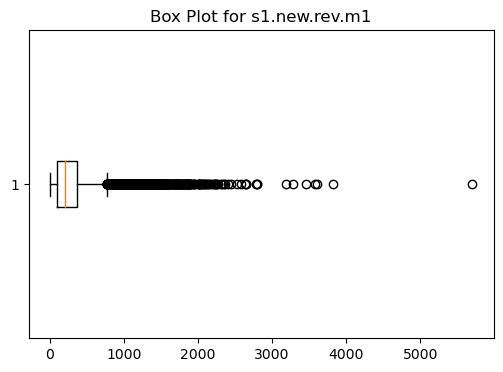

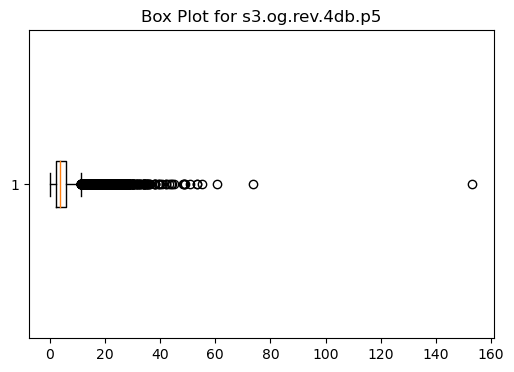

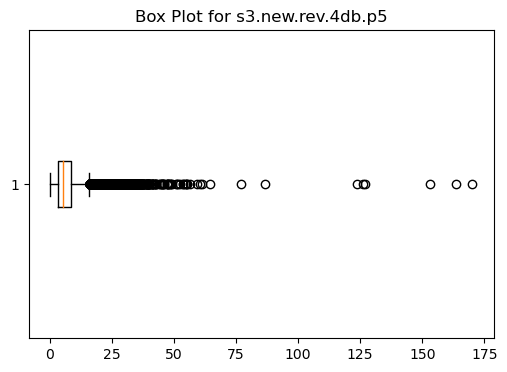

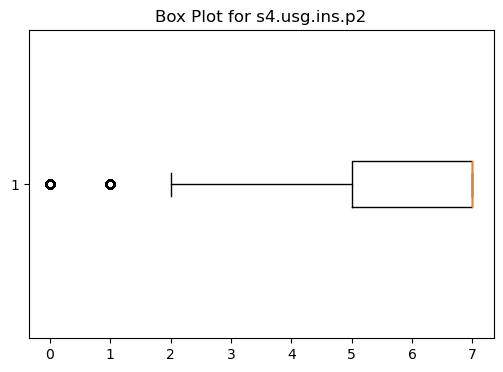

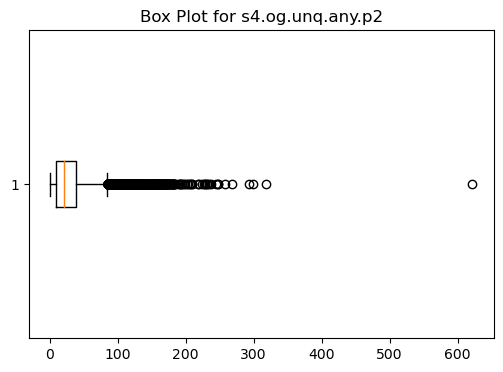

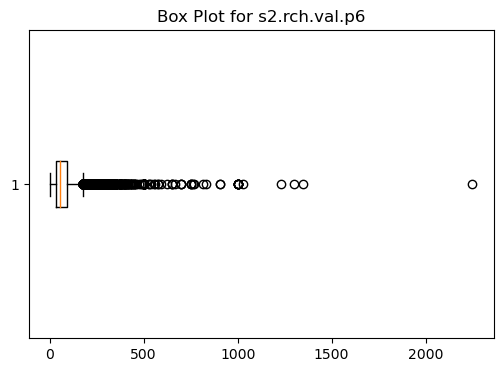

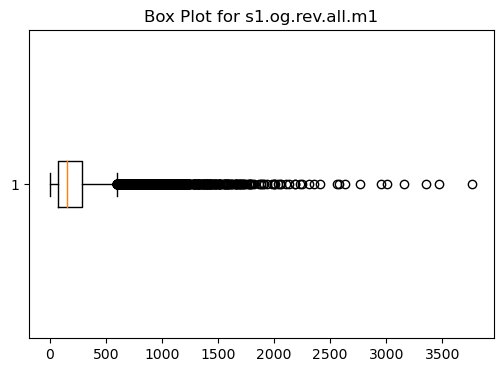

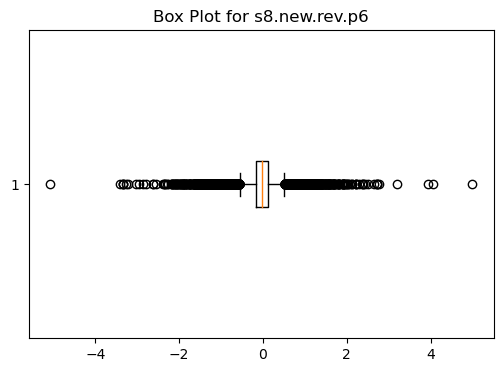

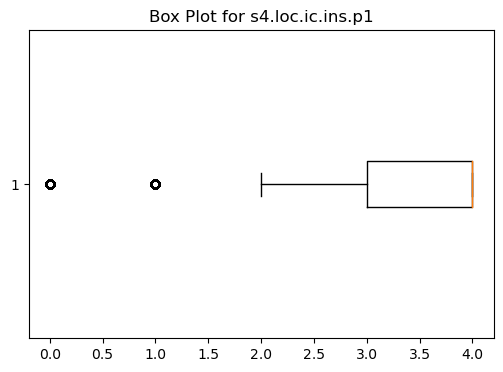

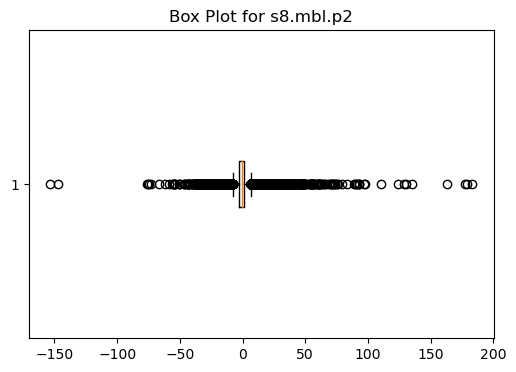

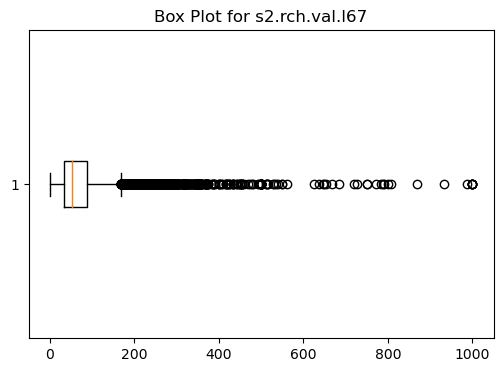

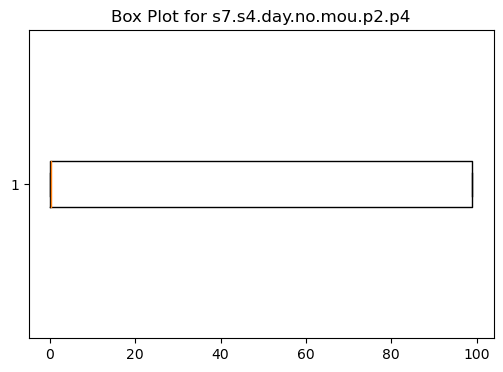

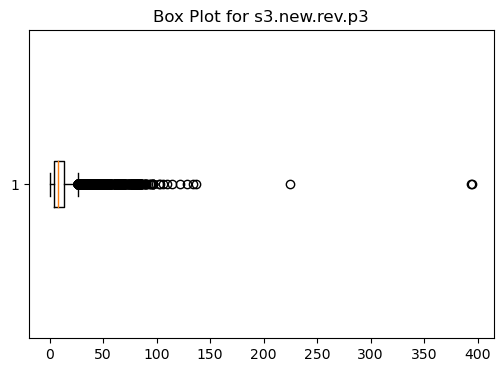

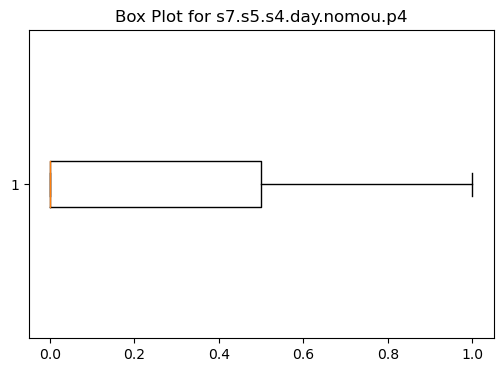

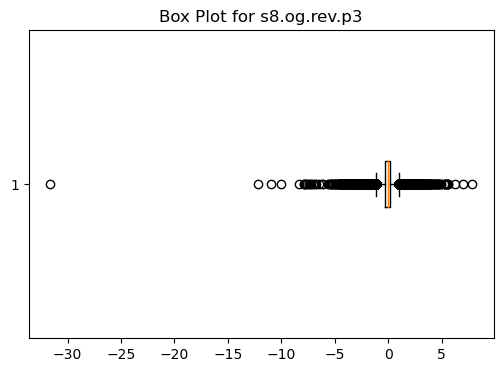

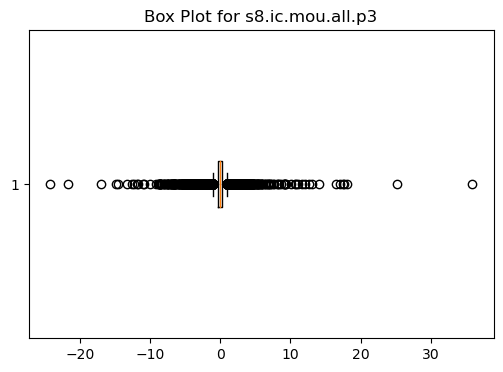

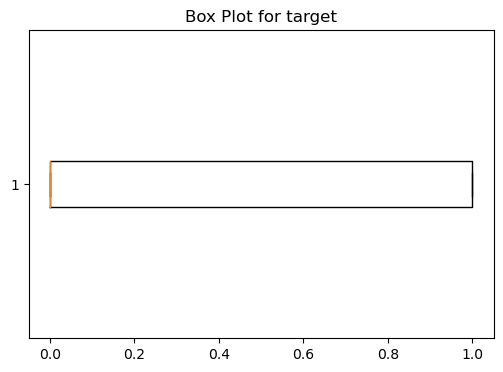

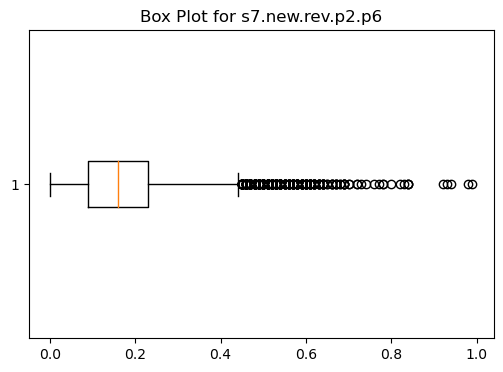

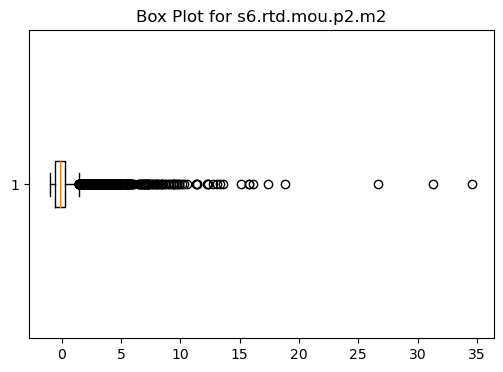

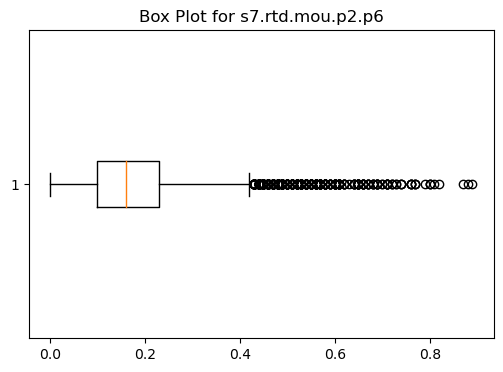

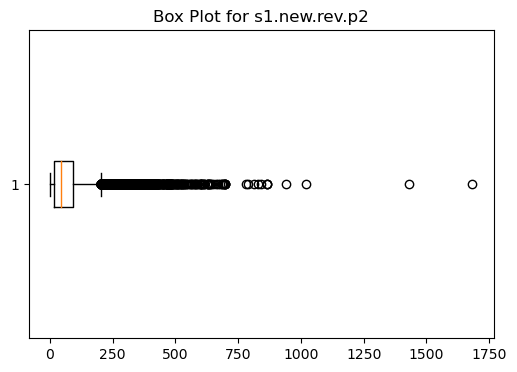

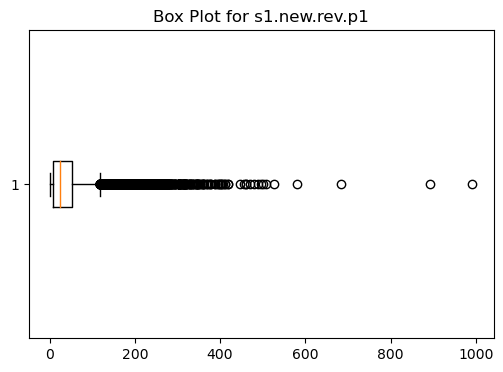

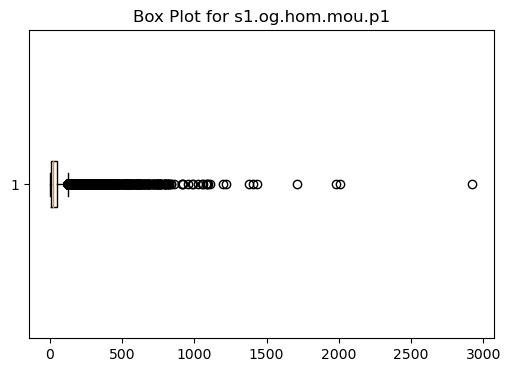

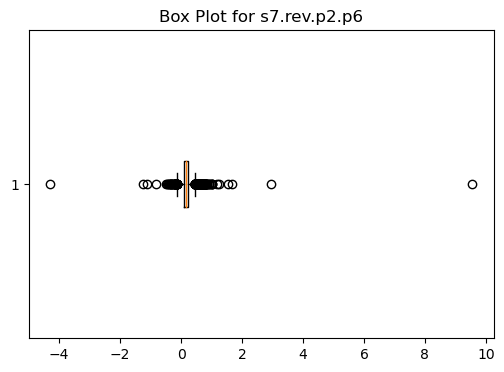

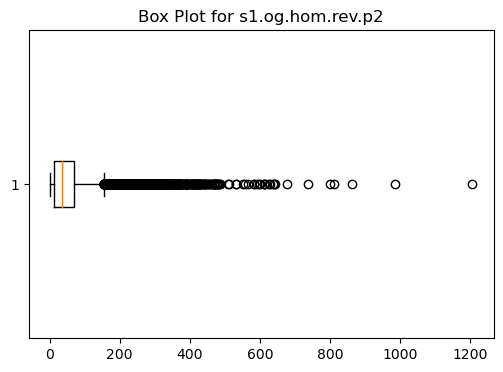

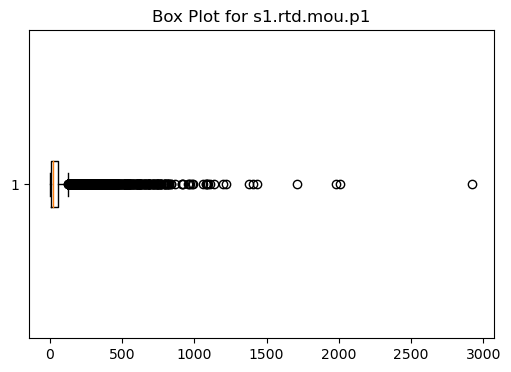

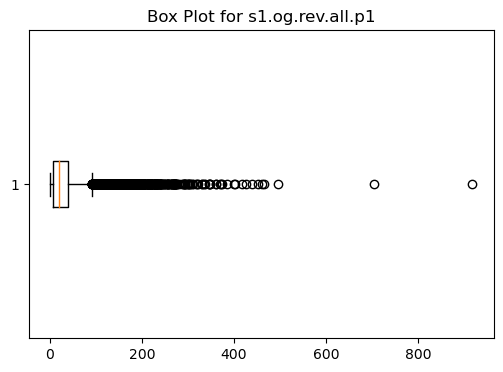

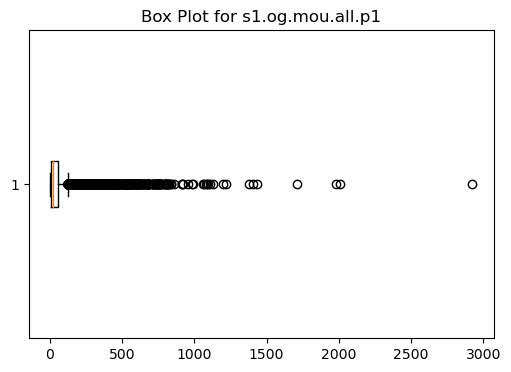

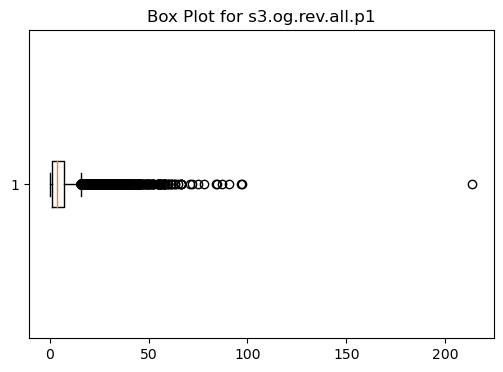

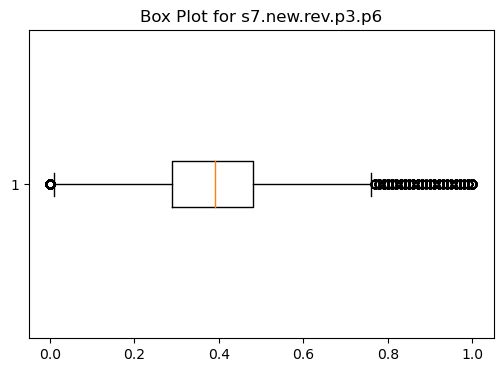

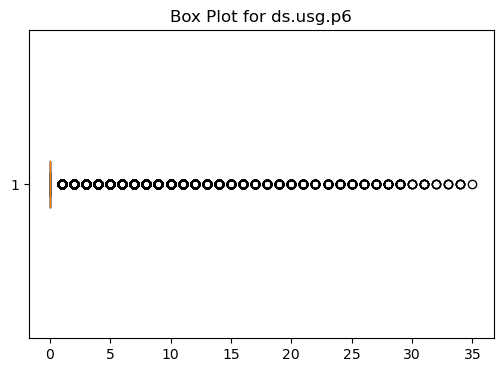

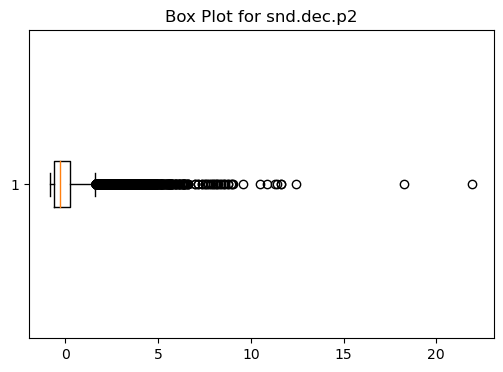

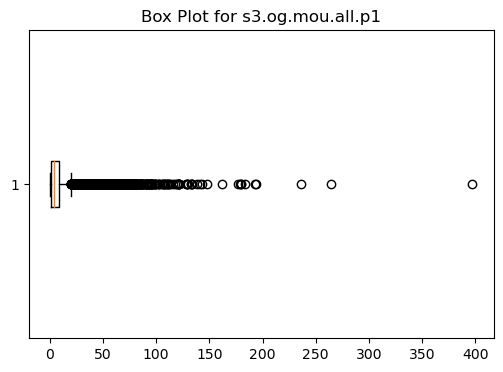

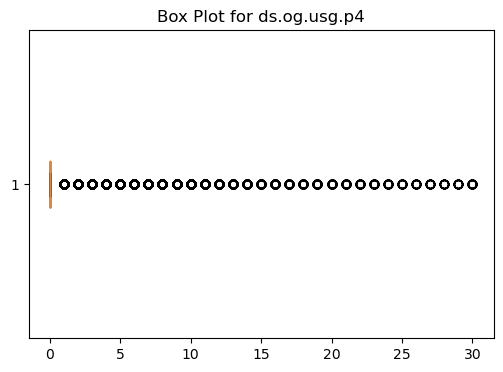

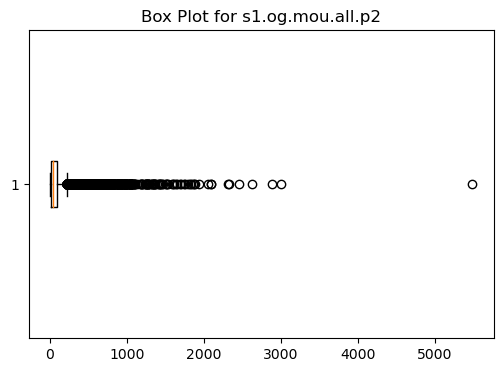

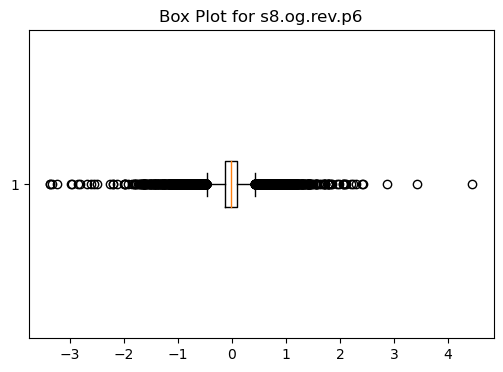

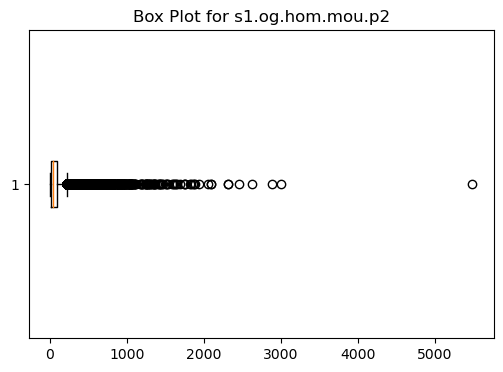

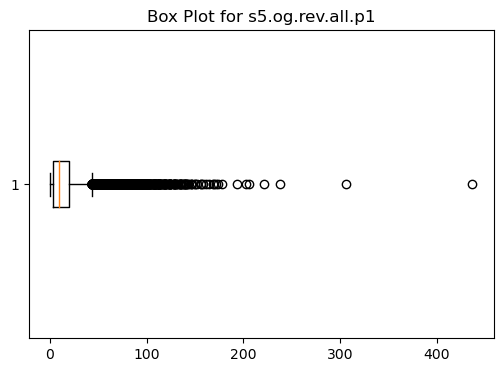

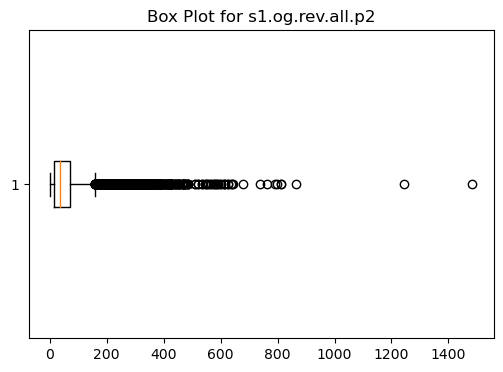

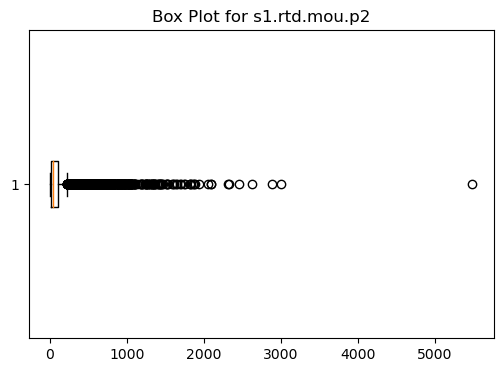

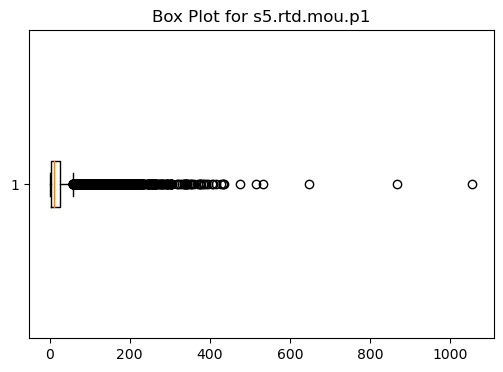

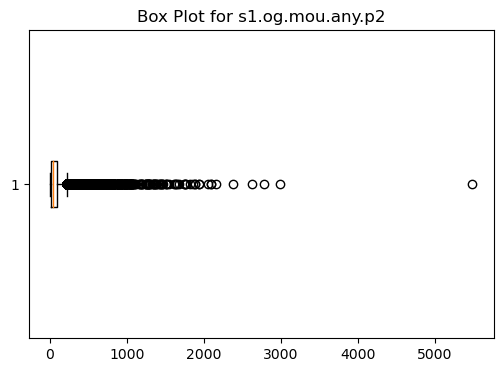

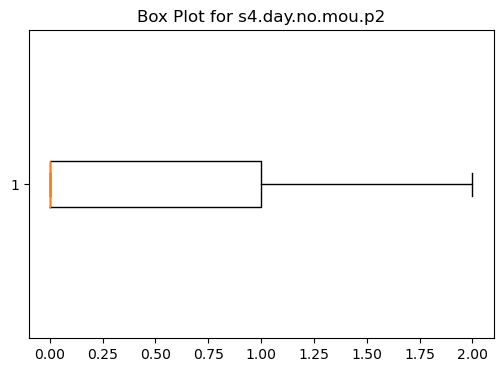

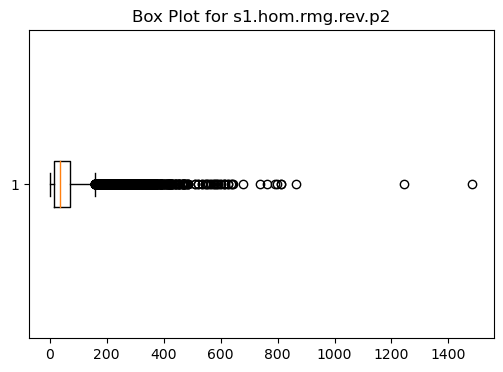

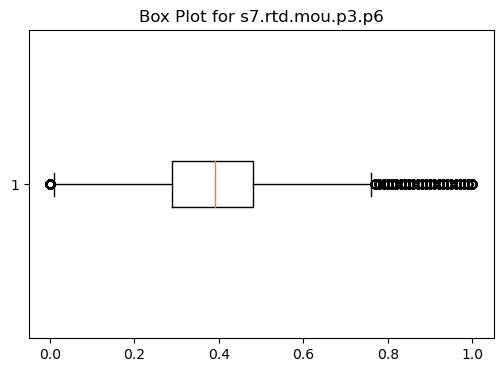

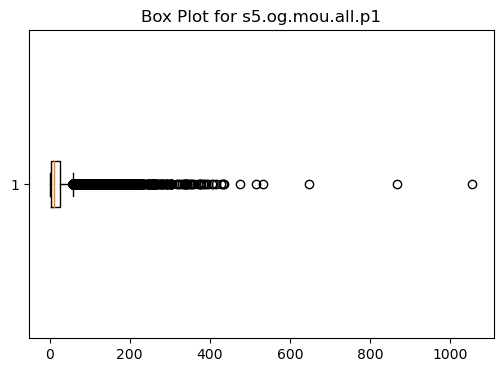

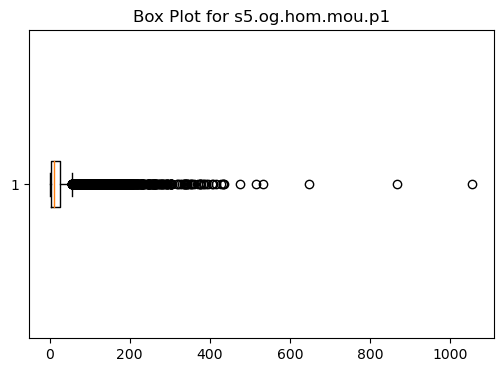

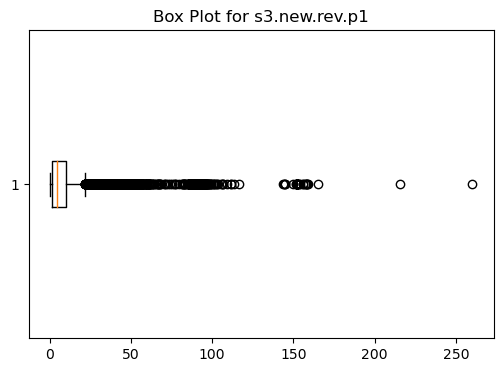

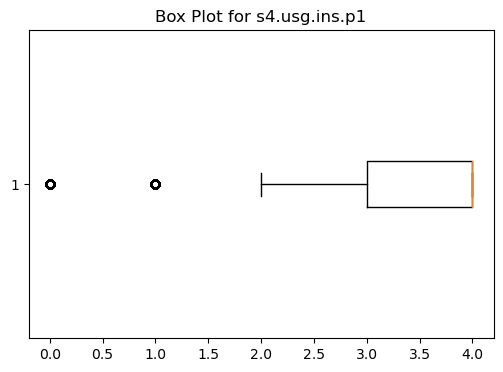

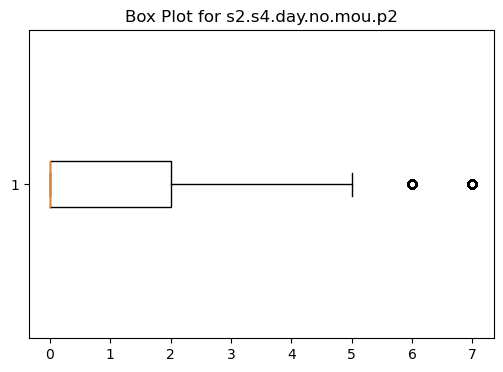

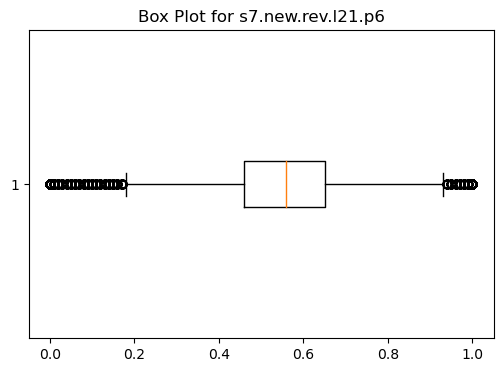

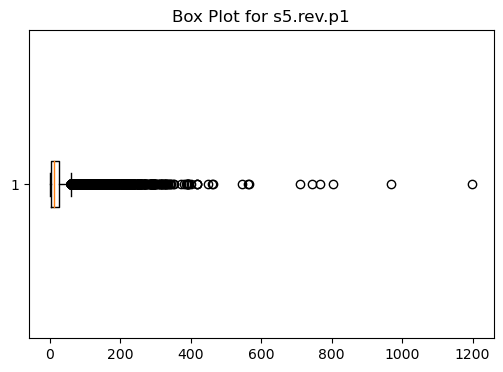

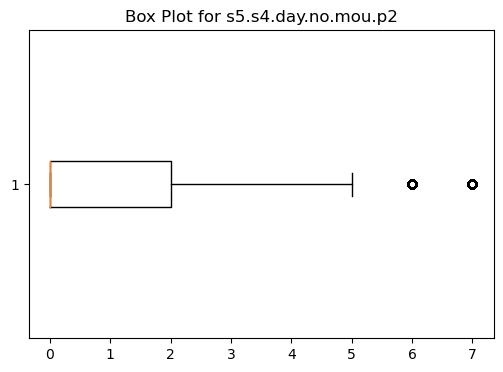

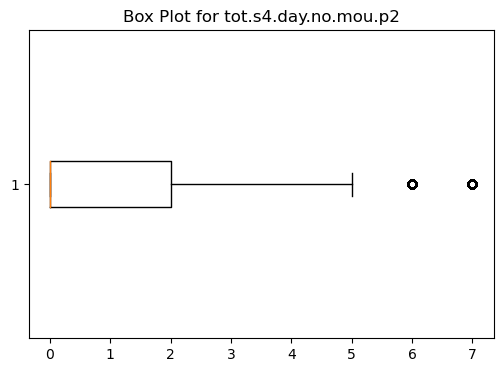

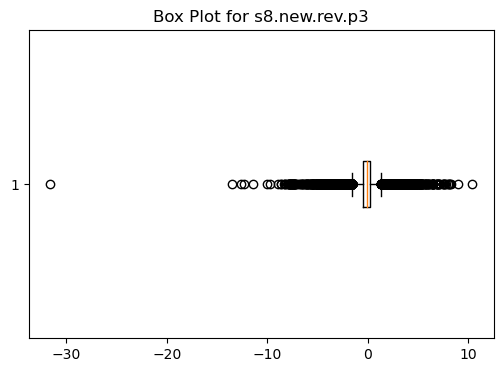

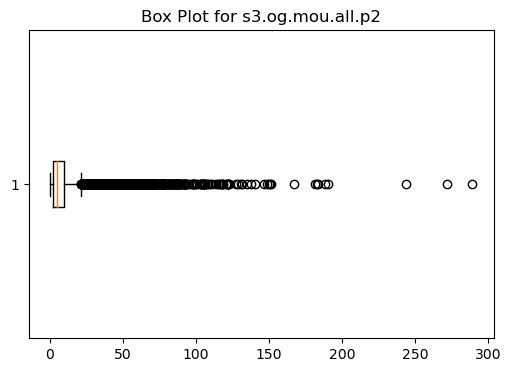

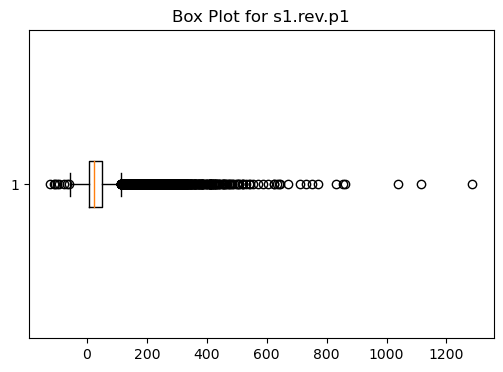

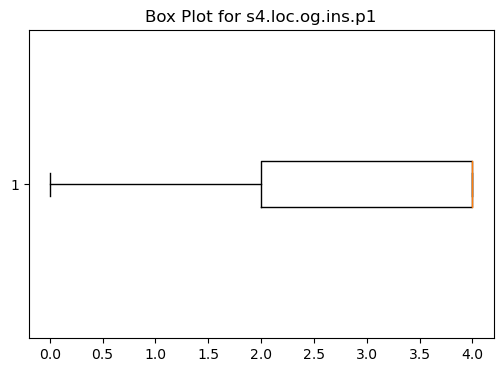

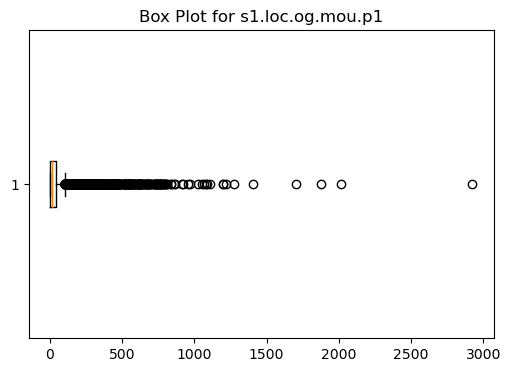

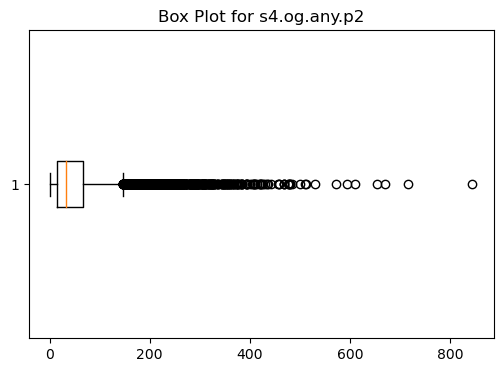

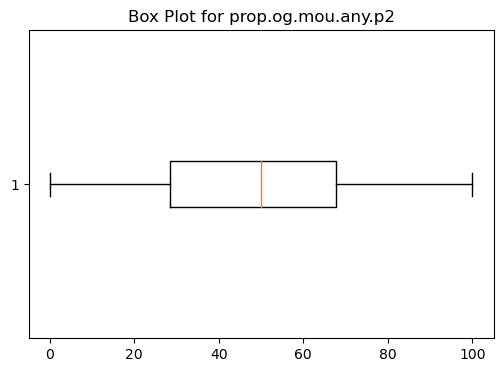

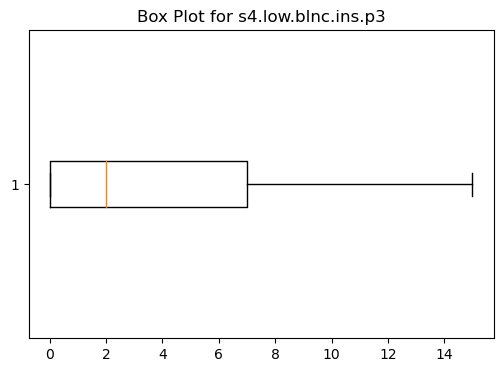

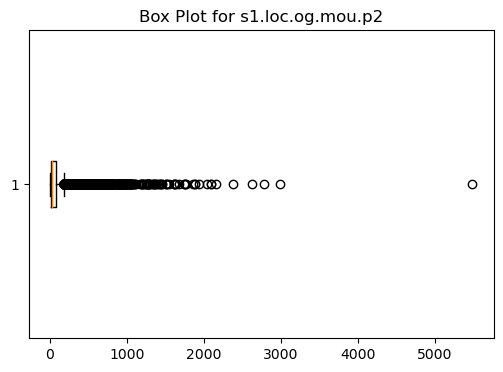

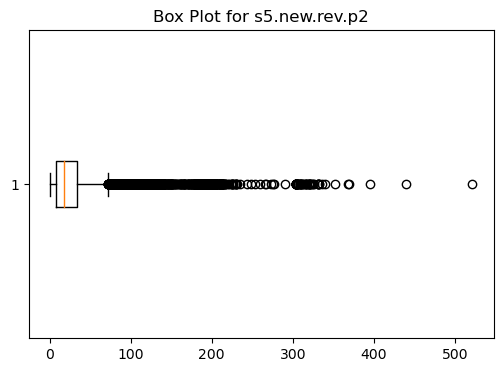

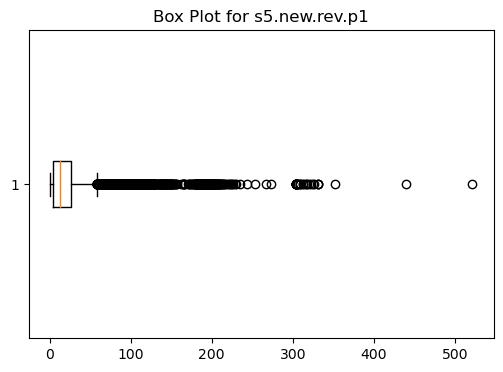

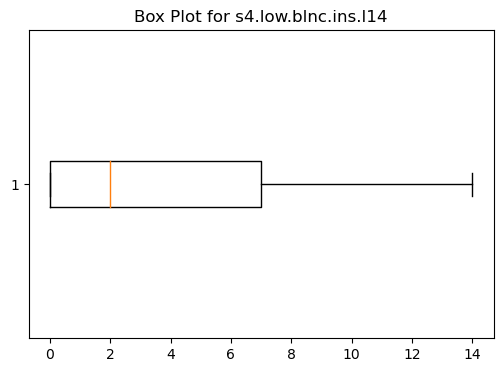

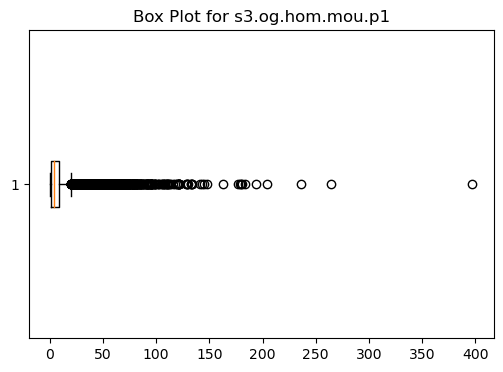

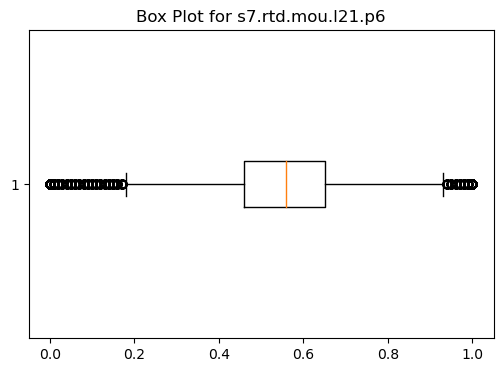

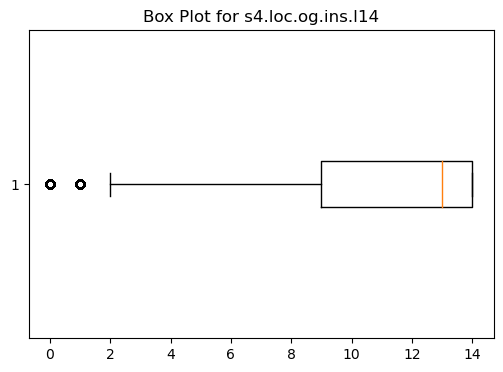

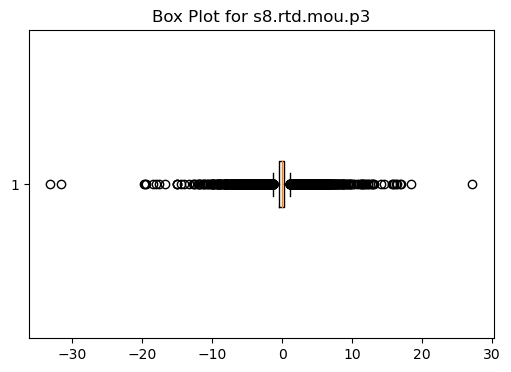

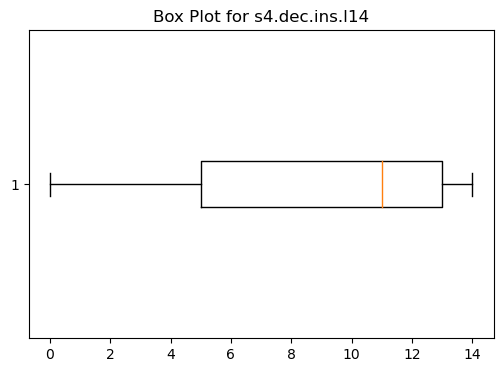

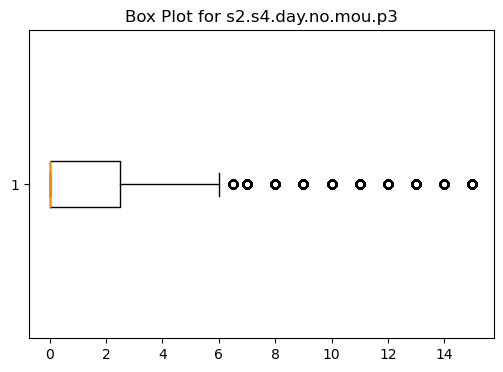

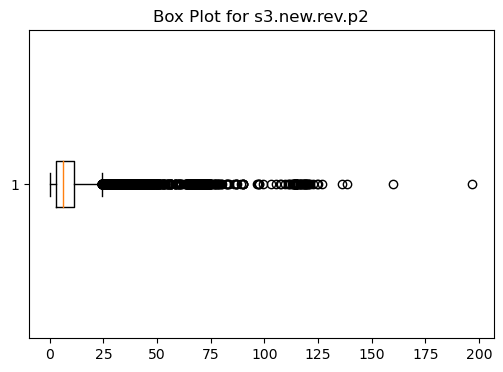

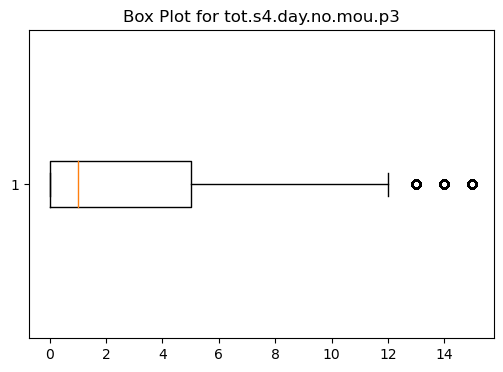

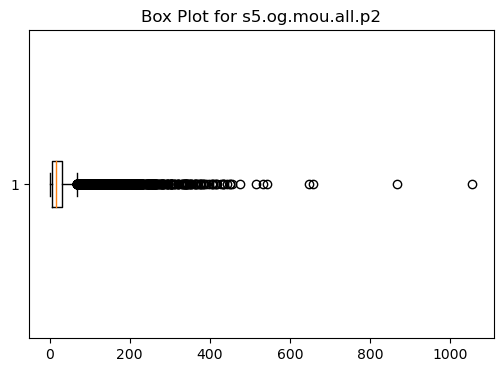

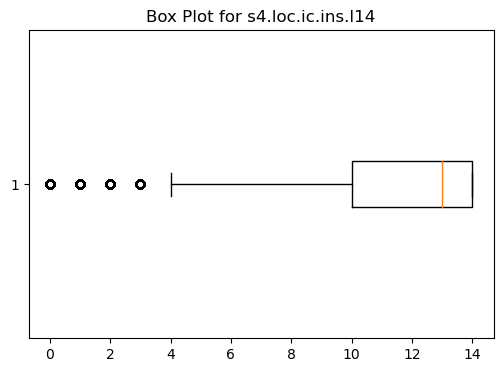

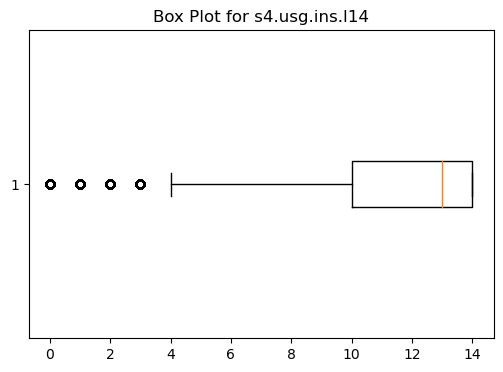

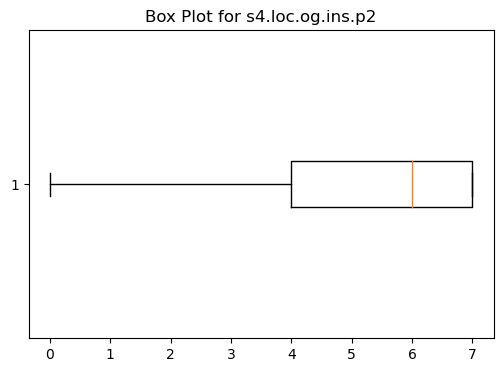

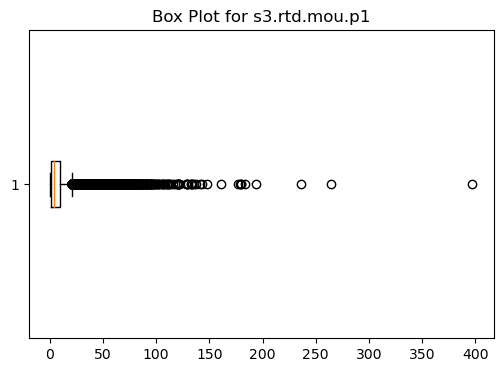

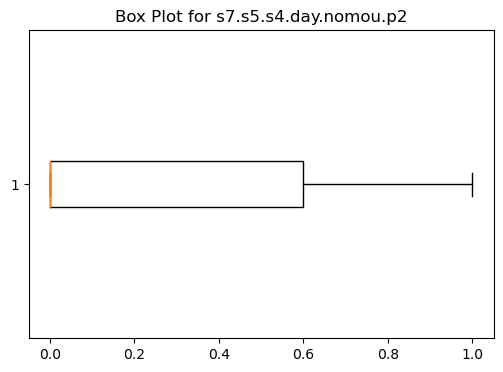

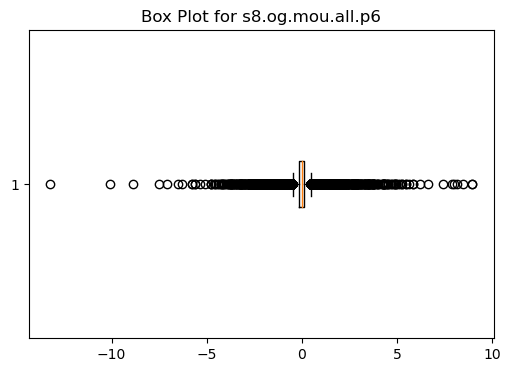

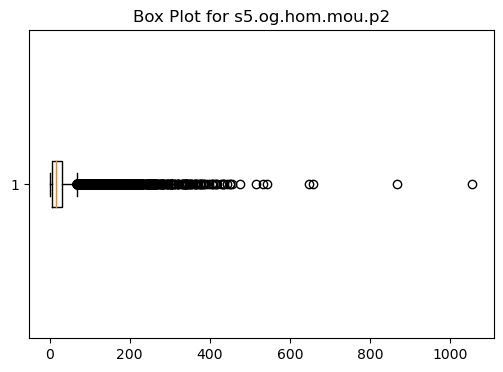

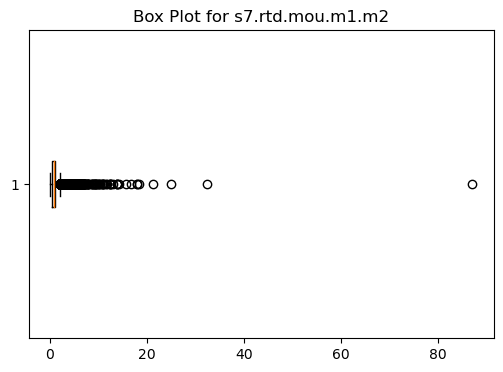

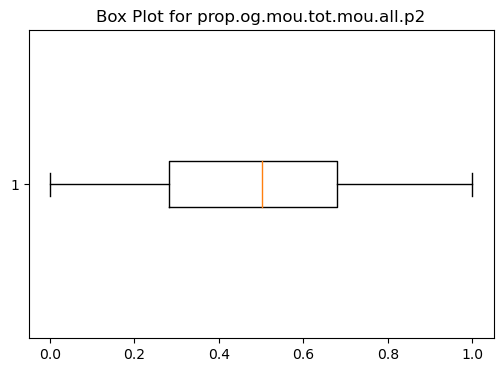

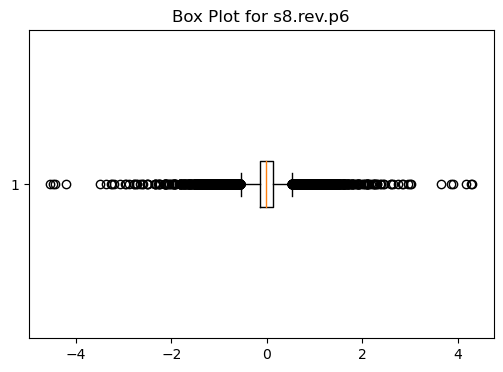

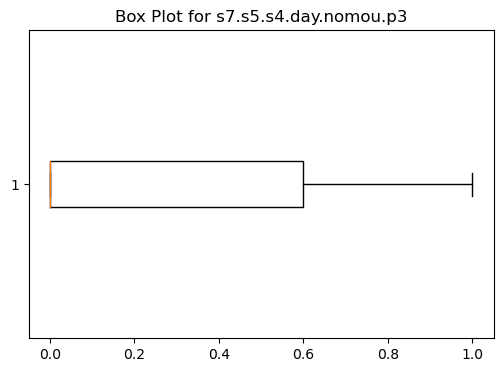

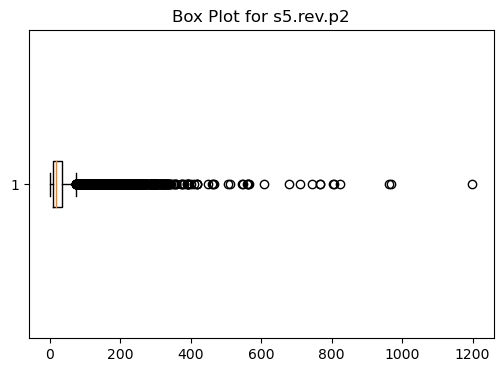

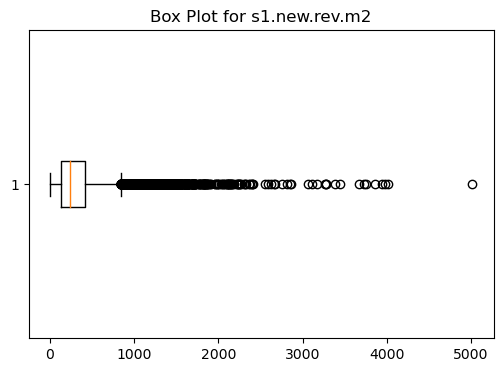

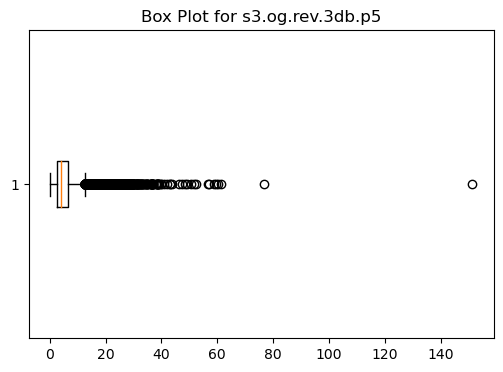

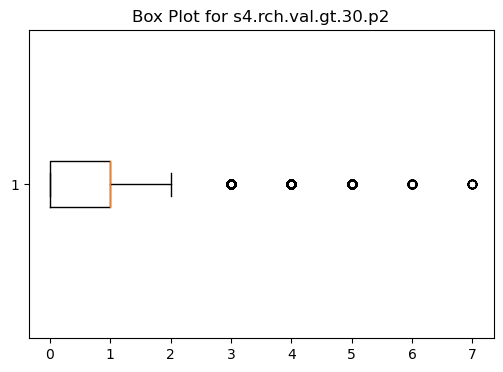

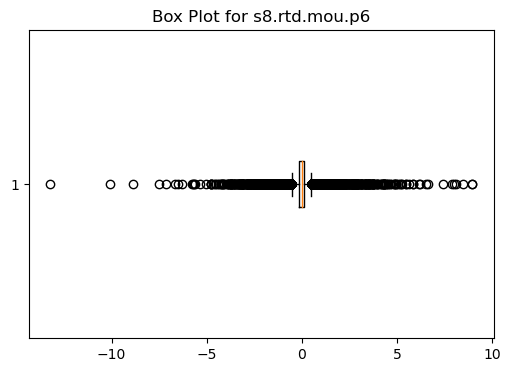

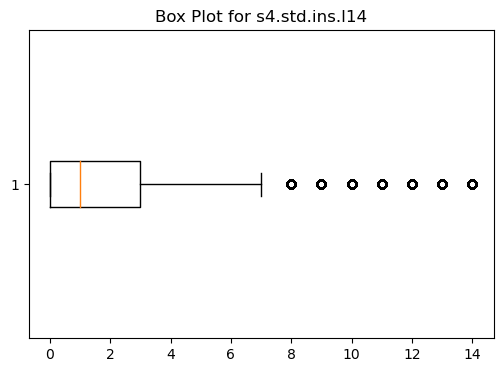

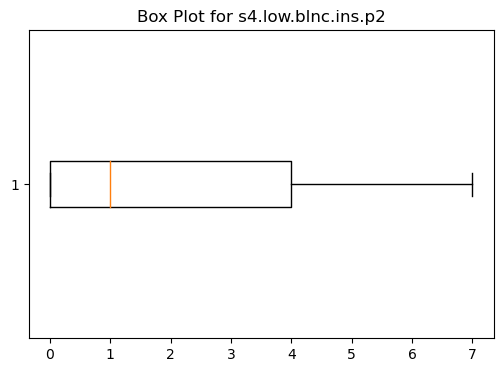

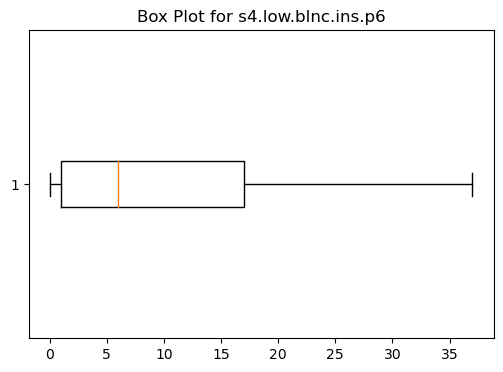

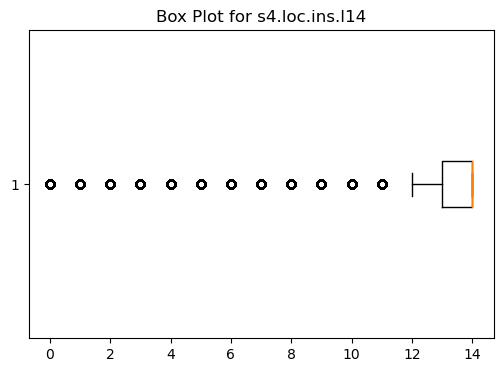

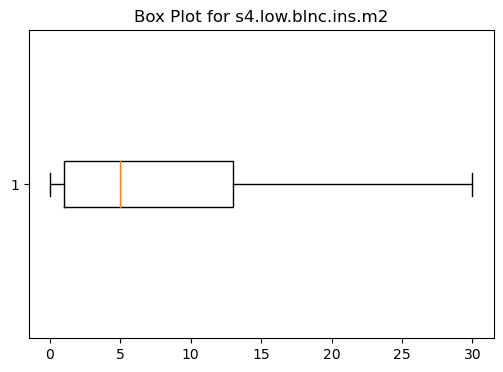

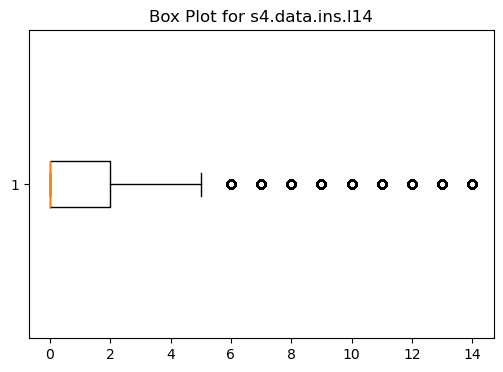

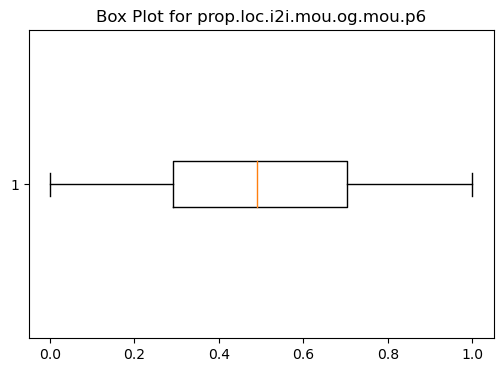

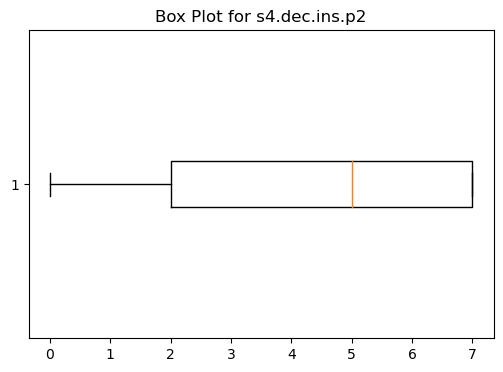

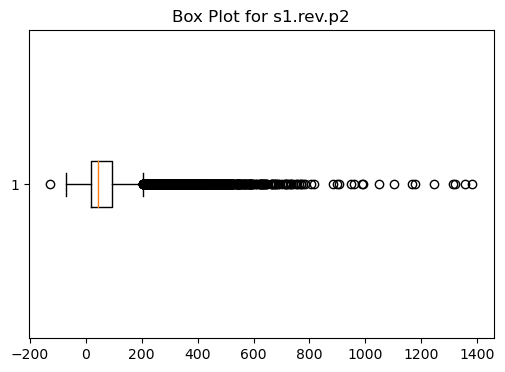

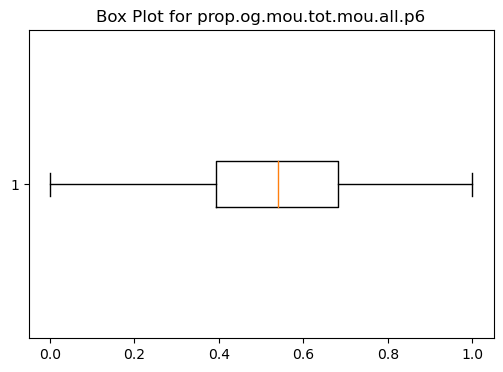

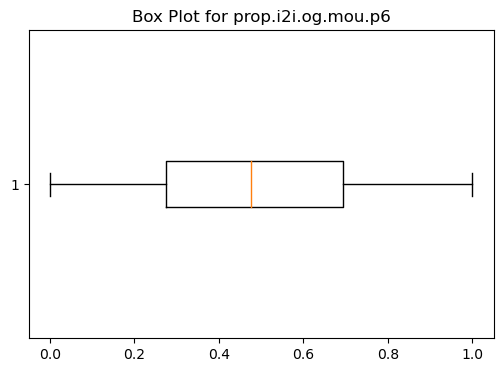

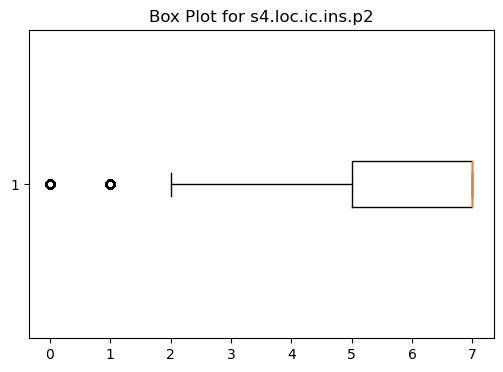

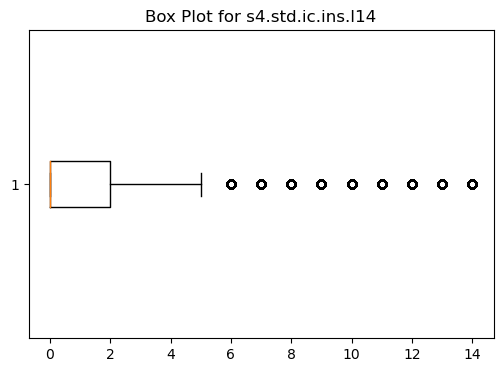

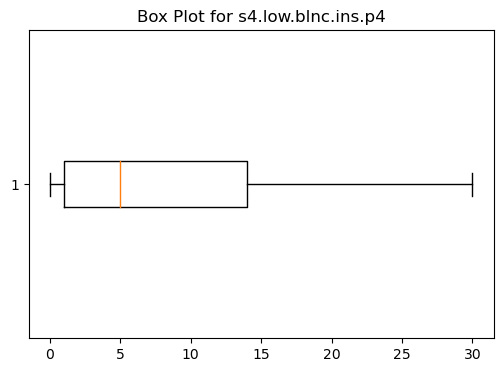

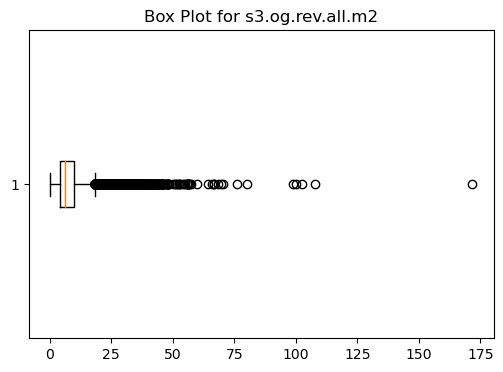

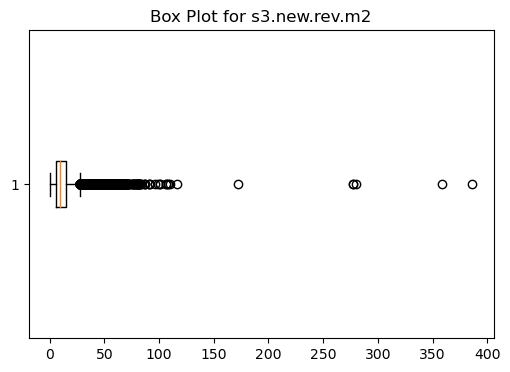

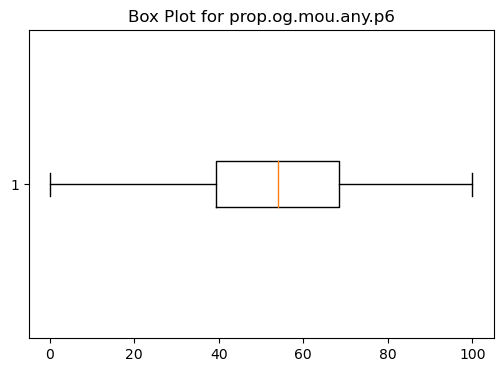

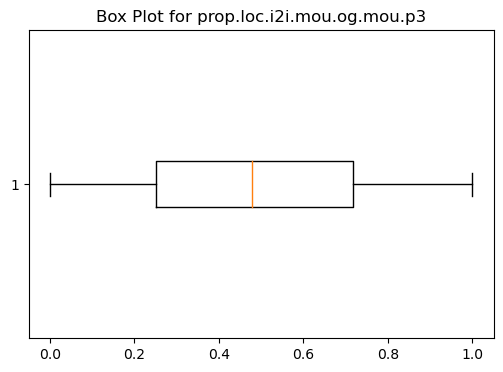

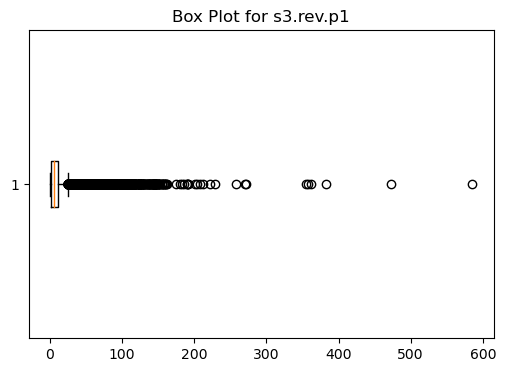

In [14]:
for column in Churn_Data.select_dtypes(include=np.number):
    plt.figure(figsize= (6, 4))
    plt.boxplot(Churn_Data[column], vert= False)
    plt.title(f"Box Plot for {column}")
    plt.show()

### Standardization: +/- 3 Sigma approach


In [16]:
#Function to detect outlier using Z-score
def detect_outlier_zscore(data_column):
    threshold = 3
    mean = np.mean(data_column)
    std_dev = np.std(data_column)
    z_scores = np.abs((data_column - mean) / std_dev)
    return z_scores > threshold

#Detect outlier for each numeric columns using z-score approach
outlier  = {}
for column in Churn_Data.select_dtypes(include=np.number):
    outlier[column] = detect_outlier_zscore(Churn_Data[column])
    

#Remove outlier from the dataset
def remove_outlier_zscore(df, outliers):
    for column in df.select_dtypes(include= ['float64','int64']).columns:
        df = df.loc[~outlier[column]]
    return df

Churn_Data_Clean = remove_outlier_zscore (Churn_Data, outliers)

#Print number of record after outlier treatment

print ("Number of records after outlier treatment:", len (Churn_Data_Clean))

Number of records after outlier treatment: 17612


### Capping & Flooring


In [17]:
#Function to cap and floot outlier based on percntile
def cap_floor_outlier_percentile (df, lower_percentile= 0.05, upper_percentile = 0.95):
    lower_bound = df.quantile(lower_percentile)
    upper_bound = df.quantile(upper_percentile)
    
#Apply capping and flooring
    for column in df.select_dtypes(include= ['float64', 'int64']).columns:
        df[column] = df[column].apply(lambda x: upper_bound[column] if x > upper_bound[column] else x)
        df[column] = df[column].apply(lambda x: upper_bound[column] if x < upper_bound[column] else x)
        
    return df

#Apply the function to the Chunr Data
Churn_Data_Clean = cap_floor_outlier_percentile(Churn_Data)

#Print number of records after outlier treatment
print ("Number of records after outlier treatment:", len (Churn_Data_Clean))

    


Number of records after outlier treatment: 25000


## Q5) Missing Value Treatment


In [15]:
#Removing records that have missing values in more than 5% of their columns
#Only records that have at least 95% of thier columns (non-NA values) will be retained
num_records_before = len (Churn_Data_Clean)
Churn_Data_Clean.dropna(thresh=len(Churn_Data_Clean.columns)* 0.95, inplace=True)
num_records_after = len (Churn_Data_Clean)
print("Number of records before removing if NA's are less than 5%:", num_records_before)
print("Number of records after removing if NA's are less than 5%:", num_records_after)

#Removing records if NA's are 50% in any variable
num_columns_before = len (Churn_Data_Clean.columns)
Churn_Data_Clean.dropna(thresh=len(Churn_Data_Clean) * 0.5, axis=1, inplace=True)
num_columns_after = len (Churn_Data_Clean.columns)
print ("Number of columns before removing if NA's are 50%:", num_columns_before)
print ("Number of columns after removing if NA's are 50%:", num_columns_after)

#Imputing with Mean/Median
numeric_cols = Churn_Data_Clean.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = Churn_Data_Clean.select_dtypes(include=['object']).columns

for column in numeric_cols:
    Churn_Data_Clean[column].fillna(Churn_Data_Clean[column].median(), inplace=True)
    
for column in numeric_cols:
    Churn_Data_Clean[column].fillna(Churn_Data_Clean[column].mode()[0], inplace=True)

Number of records before removing if NA's are less than 5%: 5101
Number of records after removing if NA's are less than 5%: 5101
Number of columns before removing if NA's are 50%: 111
Number of columns after removing if NA's are 50%: 111


## Q7) Removing the highly correlated variables


In [21]:
correlation_matrix = Churn_Data_Clean.corr().abs()
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any (upper[column] > 0.9)]
Churn_Data_Clean.drop(to_drop, axis=1, inplace=True)
print("Number of columns after removing highly correleted variables:", len(Churn_Data_Clean.columns))

Number of columns after removing highly correleted variables: 64


### Q8) Multicollinearity (VIF > 5)

In [24]:
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    vif_data["VIF"] = vif_data["VIF"].replace([np.inf, -np.inf], 9999)
    return vif_data

if 'dependent variable' in Churn_Data_Clean.columns:
    X = Churn_Data_Clean.drop(columns = ['dependent variable'])
else:
    X = Churn_Data_Clean.copy()
vif_df = calculate_vif(X)
print ("Number of columns after removing Multicollinearity:", len(Churn_Data_Clean.columns))

Number of columns after removing Multicollinearity: 64


## Model Building 

### Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [17]:
X = Churn_Data_Clean.drop(columns = ['target'],axis=1)
y = Churn_Data_Clean['target']

X_train,X_test,y_train,y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

In [25]:
initial_model = DecisionTreeClassifier(random_state = 42)
initial_model.fit(X_train,y_train)

initial_y_pred = initial_model.predict(X_test)

print ("initial Model Confusion Matrix:")
print (confusion_matrix(y_test,initial_y_pred ))

print ("\ninitial Model Classification Report:")
print (classification_report(y_test, initial_y_pred))

print ("\ninitial Model Accuracy Score:")
print (accuracy_score(y_test, initial_y_pred))
acc_prec = accuracy_score(y_test, initial_y_pred)* 100
print ("\nAccuracy Percentage:", round(acc_prec, 3), "%")

initial Model Confusion Matrix:
[[567 176]
 [145 133]]

initial Model Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       743
           1       0.43      0.48      0.45       278

    accuracy                           0.69      1021
   macro avg       0.61      0.62      0.62      1021
weighted avg       0.70      0.69      0.69      1021


initial Model Accuracy Score:
0.6856023506366308

Accuracy Percentage: 68.56 %


### Hyperparameter tuning for Decision tree Model

In [26]:
#Defining the parameter grid
param_grid  = {
    'max_depth': [None, 10,20],
    'max_features': ['sqrt', 'log2', None]
}

#Create the dicision model
dt_model= DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

#Print the best parameters found by GridSearchCV

print ("\nBest parameters found by GridSearchCV:")
print (grid_search.best_params_)


best_model = grid_search.best_estimator_
tuned_y_pred = best_model.predict(X_test)

print ("\nTuned Model Confusion Matrix:")
print (confusion_matrix(y_test,tuned_y_pred ))

print ("\nTuned Model Classification Report:")
print (classification_report(y_test, tuned_y_pred))

acc_prec = accuracy_score(y_test, tuned_y_pred)* 100
print ("\nTuned Model Accuracy Percentage:", round(acc_prec, 3), "%")


Best parameters found by GridSearchCV:
{'max_depth': 10, 'max_features': None}

Tuned Model Confusion Matrix:
[[611 132]
 [166 112]]

Tuned Model Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       743
           1       0.46      0.40      0.43       278

    accuracy                           0.71      1021
   macro avg       0.62      0.61      0.62      1021
weighted avg       0.70      0.71      0.70      1021


Tuned Model Accuracy Percentage: 70.813 %


### Random Forest

In [20]:
rf_model = RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)

initial_y_pred=rf_model.predict(X_test)

print("Initial Model Confusion Matrix:")
print(confusion_matrix(y_test,initial_y_pred))

print ("\nInitial Model Classification Report:")
print (classification_report(y_test, initial_y_pred))

print("\nInitial Model Accuracy Score:")
print(accuracy_score(y_test,initial_y_pred))
acc_prec = accuracy_score(y_test, initial_y_pred)* 100
print ("\n Accuracy Percentage:", round(acc_prec, 3), "%")

Initial Model Confusion Matrix:
[[686  57]
 [172 106]]

Initial Model Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.92      0.86       743
           1       0.65      0.38      0.48       278

    accuracy                           0.78      1021
   macro avg       0.72      0.65      0.67      1021
weighted avg       0.76      0.78      0.75      1021


Initial Model Accuracy Score:
0.7757100881488737

 Accuracy Percentage: 77.571 %


### Hyperparameter tuning for Random Forest Model

In [31]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'max_features': ['sqrt', 'log2']
}

#Create the random Forest model

rf_model = RandomForestClassifier()

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print ("Best Hyperparameters:", best_params)

best_rf_model = RandomForestClassifier(**best_params)
best_rf_model.fit(X_train, y_train)

best_model = grid_search.best_estimator_
tuned_y_pred = best_model.predict(X_test)

#Evaluate the tuned model
print("\nTuned Model Confusion Matrix:")
print(confusion_matrix(y_test, tuned_y_pred))

print("\nTuned Model Classification Matrix:")
print(classification_report(y_test, tuned_y_pred))

acc_prec = accuracy_score(y_test, tuned_y_pred)* 100
print ("\nTuned Model Accuracy:", round(acc_prec, 3), "%")



Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Hyperparameters: {'max_depth': None, 'max_features': 'log2', 'n_estimators': 100}

Tuned Model Confusion Matrix:
[[688  55]
 [177 101]]

Tuned Model Classification Matrix:
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       743
           1       0.65      0.36      0.47       278

    accuracy                           0.77      1021
   macro avg       0.72      0.64      0.66      1021
weighted avg       0.76      0.77      0.75      1021


Tuned Model Accuracy: 77.277 %


### Logistic Regression

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression(max_iter=5000, solver="liblinear")

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report= classification_report (y_test, y_pred)


acc_prec = accuracy_score(y_test, y_pred)*100
print("\nAccuracy Percentage:", round(acc_prec, 3), "%")
print ("Confusion Matrix:")
print (conf_matrix)
print ("Classification Report:")
print (class_report)




Accuracy Percentage: 77.375 %
Confusion Matrix:
[[676  67]
 [164 114]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       743
           1       0.63      0.41      0.50       278

    accuracy                           0.77      1021
   macro avg       0.72      0.66      0.68      1021
weighted avg       0.76      0.77      0.76      1021



### Hyperparameter tuning forLogistic Regressiont Model

In [36]:
param_grid = {
    'solver': ['liblinear','saga'],
    'penalty': ['l1','l2'],
    'C':[0.01,0.1,1,10,100],
    'max_iter':[1000,2000,5000]
}

logreg = LogisticRegression()

grid_search = GridSearchCV(logreg, param_grid, cv=5, verbose=1,n_jobs =-1)

grid_search.fit(X_train_scaled,y_train)

best_params = grid_search.best_params_

print(f'Best parameters: {best_params}')

best_estimator = grid_search.best_estimator_
y_pred_best = best_estimator.predict(X_test_scaled)

accuracy_best = accuracy_score(y_test,y_pred_best)
conf_matrix_best = confusion_matrix(y_test,y_pred_best)
class_report_best = classification_report(y_test,y_pred_best)

print(f'Accuracy of Best Model: {accuracy_best}')
print('Confusion Matrix of Best Model:')
print (conf_matrix_best)
print ("Classification Report of Best Model:")
print (class_report_best)

acc_prec_best = accuracy_best * 100
print("\nAccuracy Percentage of Best Model:", round (acc_prec_best, 3), "%")

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters: {'C': 0.01, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'saga'}
Accuracy of Best Model: 0.7845249755142018
Confusion Matrix of Best Model:
[[691  52]
 [168 110]]
Classification Report of Best Model:
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       743
           1       0.68      0.40      0.50       278

    accuracy                           0.78      1021
   macro avg       0.74      0.66      0.68      1021
weighted avg       0.77      0.78      0.76      1021


Accuracy Percentage of Best Model: 78.452 %


### Plotting the ROC Curve

In [1]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [4]:
draw_roc(y_train['churn'], y_train['churn_prob'])

NameError: name 'y_train' is not defined